In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
data =  pd.read_csv('forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:



fire_data = pd.read_csv('preprocessed_firedata.csv')
firedata_nomalized = pd.read_csv('firedata_nomalized.csv')
firedata_nomalized_nonzer = pd.read_csv('firedata_nomalized_nonzero.csv')
firedata_log = pd.read_csv('firedata_log.csv')
firedata_log_nonzero = pd.read_csv('firedata_log_nonzero.csv')
firedata_sqrt= pd.read_csv('firedata_sqrt.csv')
firedata_sqrt_nonzero = pd.read_csv('firedata_sqrt_nonzero.csv')

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


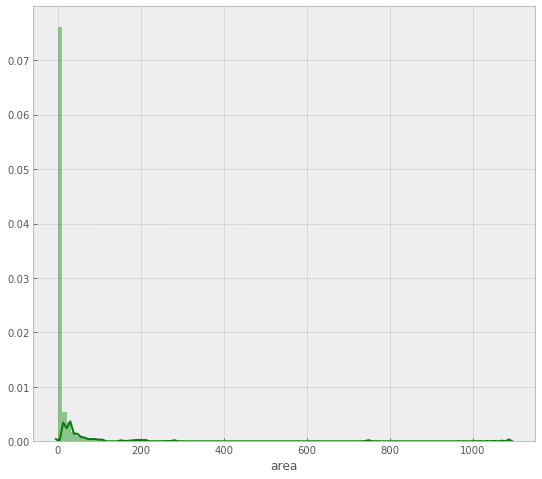

In [13]:
print(data['area'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['area'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [27]:
data[data['area']==0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [37]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [39]:
df_num.drop(df_num.columns[[0,1]], axis='columns', inplace =True)
df_num.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010C26E586D0>,
      dtype=object)

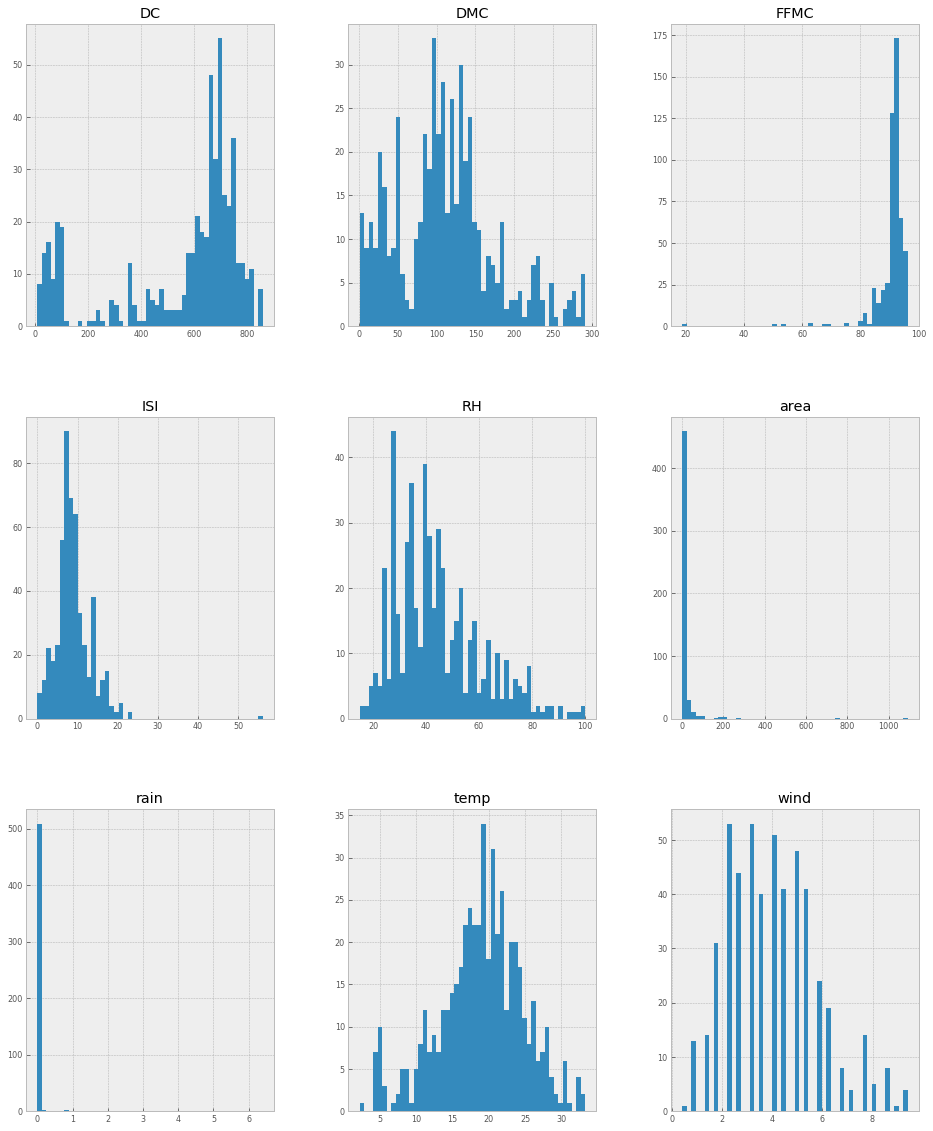

In [41]:
df_num.hist(figsize=(16,20),bins=50, xlabelsize=8, ylabelsize=8)

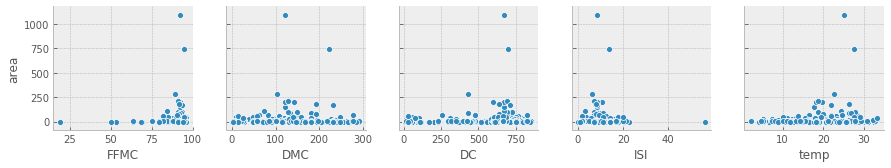

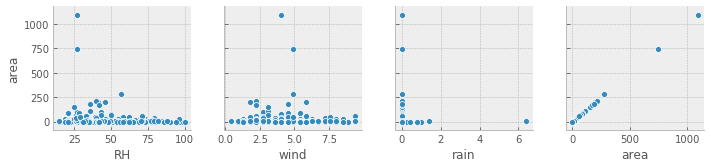

In [49]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['area'])

In [52]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1):
    tmpDf = df_num[[df_num.columns[i], 'area']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['area'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

             RH: -0.07551856346988933
            ISI: 0.007511170018238671
           wind: 0.012317276888673134
           FFMC: 0.04012200415862087
             DC: 0.04938322529891624
            DMC: 0.07299429625105738
           temp: 0.09784410734168486
           rain: 0.9883033014195762


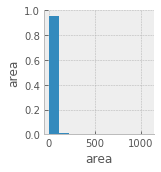

In [53]:
sns.pairplot(data=df_num,
                x_vars=df_num.columns[8],
                y_vars=['area'])

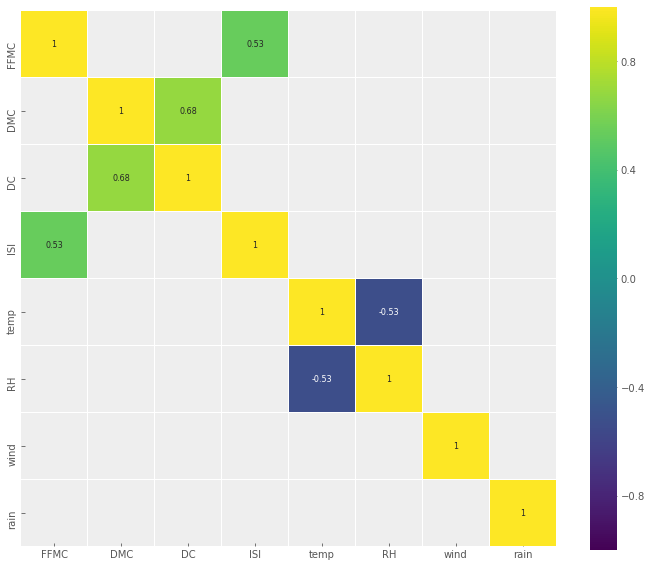

In [54]:
corr = df_num.drop('area', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [63]:
quantitative_features_list = ['FFMC', 'DMC', 'DC', 'ISI','temp','RH','wind', 'rain', 'area']


In [65]:
df_quantitative_values = data[quantitative_features_list]
df_quantitative_values.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [82]:
categorical_features = [a for a in quantitative_features_list[:-1] + data.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in data.columns.tolist())]
df_categ = data[categorical_features]
df_categ = df_categ.drop(['X','Y'], axis=1)
df_categ.head()


,month,day,area
0,mar,fri,0.0
1,oct,tue,0.0
2,oct,sat,0.0
3,mar,fri,0.0
4,mar,sun,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

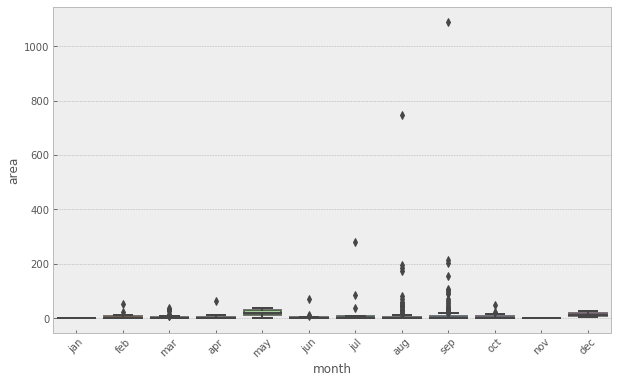

In [86]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='month', y='area', data=df_categ, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

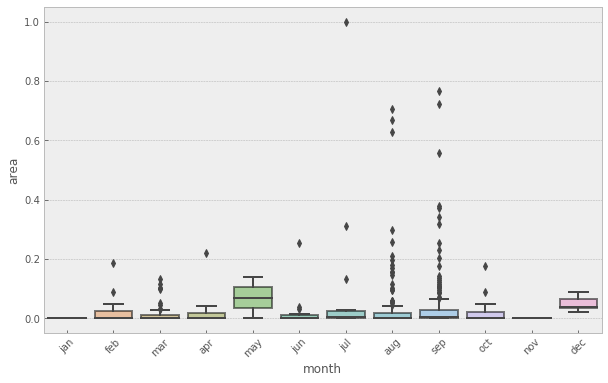

In [108]:
data = data[data['area'] <700]
cols_to_norm = ['area']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
categorical_features = [a for a in quantitative_features_list[:-1] + data.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in data.columns.tolist())]
df_categ = data[categorical_features]
df_categ = df_categ.drop(['X','Y'], axis=1)

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='month', y='area', data=df_categ, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

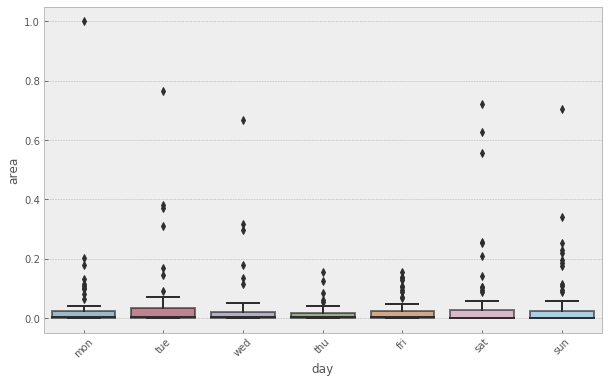

In [111]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='day', y='area', data=df_categ,order=['mon','tue','wed','thu','fri','sat','sun'] )
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<Figure size 720x432 with 0 Axes>

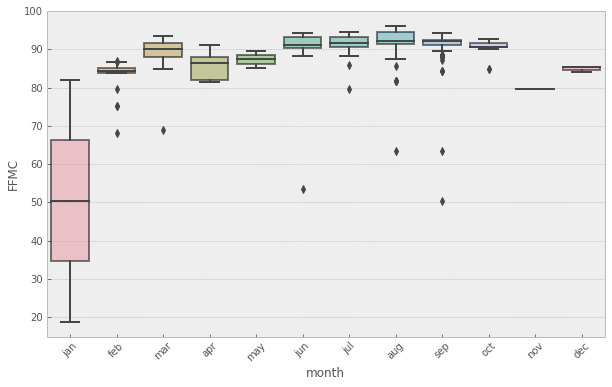

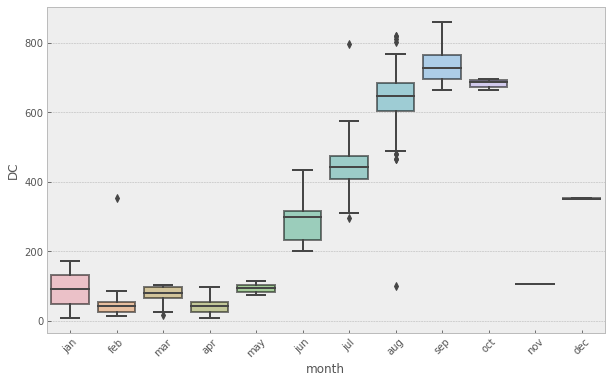

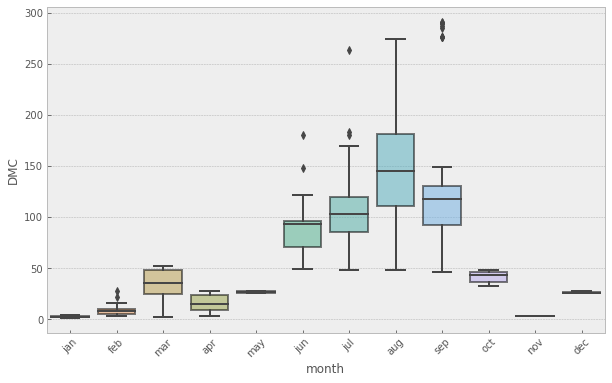

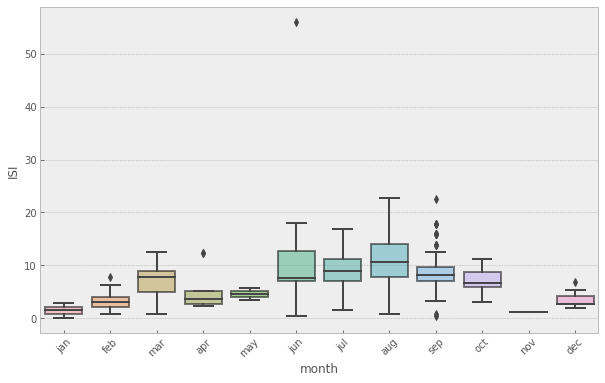

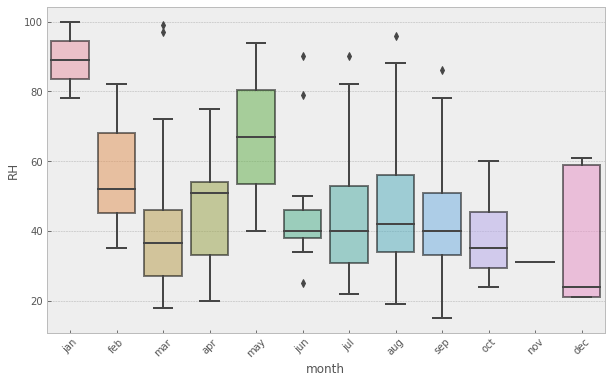

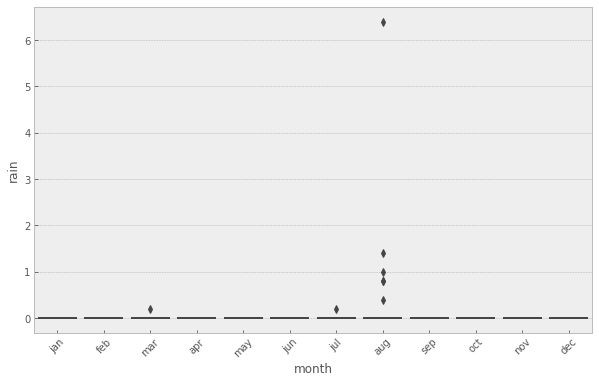

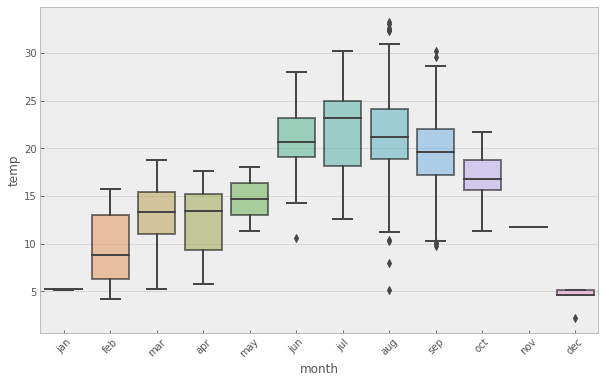

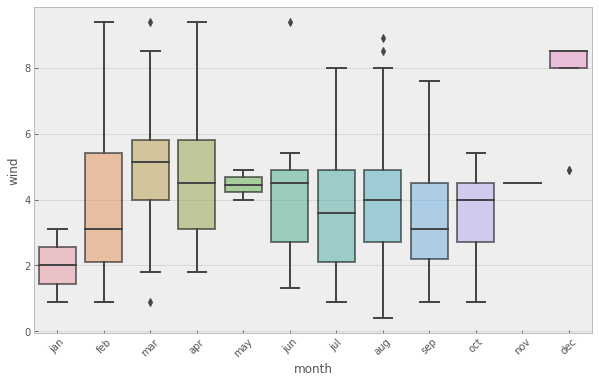

<Figure size 720x432 with 0 Axes>

In [125]:

    
plt.figure(figsize = (10, 6))
ax1 = sns.boxplot(x='month', y='FFMC', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax1.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

plt.figure(figsize = (10, 6))
ax2 = sns.boxplot(x='month', y='DC', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax2.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

plt.figure(figsize = (10, 6))
ax3 = sns.boxplot(x='month', y='DMC', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax3.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.figure(figsize = (10, 6))

ax4 = sns.boxplot(x='month', y='ISI', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax4.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.figure(figsize = (10, 6))

ax5 = sns.boxplot(x='month', y='RH', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax5.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.figure(figsize = (10, 6))

ax6 = sns.boxplot(x='month', y='rain', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax6.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.figure(figsize = (10, 6))

ax7 = sns.boxplot(x='month', y='temp', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax7.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.figure(figsize = (10, 6))

ax8 = sns.boxplot(x='month', y='wind', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.setp(ax8.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.figure(figsize = (10, 6))